## Import the required libraries

In [1]:
import nltk
from nltk.corpus import names
from nltk.classify import apply_features
from nltk.corpus import stopwords
from nltk.corpus import inaugural
import pandas as pd
import numpy as np
import string

## 1. Load the corpus inaugural from nltk corpus module
There are many available corpus in nltk. But inaugural seems interesting which contain the US President's speeches in text form. 

In [2]:
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

## Analysis '2021-Biden.txt' from this corpus.
We will examine all textual data from this corpus but before dive into real analysis let's examine the most recent 2021-Biden.txt 

In [3]:
words = inaugural.words('2021-Biden.txt')
print(words[0:50])

['Chief', 'Justice', 'Roberts', ',', 'Vice', 'President', 'Harris', ',', 'Speaker', 'Pelosi', ',', 'Leader', 'Schumer', ',', 'Leader', 'McConnell', ',', 'Vice', 'President', 'Pence', ',', 'and', 'my', 'distinguished', 'guests', ',', 'and', 'my', 'fellow', 'Americans', ':', 'This', 'is', 'America', "'", 's', 'day', '.', 'This', 'is', 'democracy', "'", 's', 'day', ',', 'a', 'day', 'of', 'history', 'and']


## Unique Words from '2021-Biden.txt'.
This text data contains punctuations which is unwanted. So, we are going to find some unique words out of this text

print(f"Length of Biden's presindential speech 2021: {len(words)}")

In [4]:
from nltk.corpus import stopwords
def unique_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unique_w = text_vocab.difference(english_vocab)
    return sorted(unique_w)

In [5]:
uniq_words = unique_words(words)
print(f"Number of unique words in 2021 President Speech: {len(uniq_words)}, and some unique words are: ")
print(unique_words(words)[:10])

Number of unique words in 2021 President Speech: 147, and some unique words are: 
['acted', 'addâ', 'adversaries', 'ages', 'alliances', 'americans', 'americansâ', 'americaâ', 'angels', 'answered']


## Let's find the most frequent unique words in 2021 President speech 

In [6]:
fdist = nltk.FreqDist([w.lower() for w in words])
uniq_words_dist ={} 
for i in range(len(uniq_words)):
    if fdist[uniq_words[i]]>1:
        uniq_words_dist[uniq_words[i]]=fdist[uniq_words[i]]
uniq_words_dist=nltk.FreqDist(uniq_words_dist)

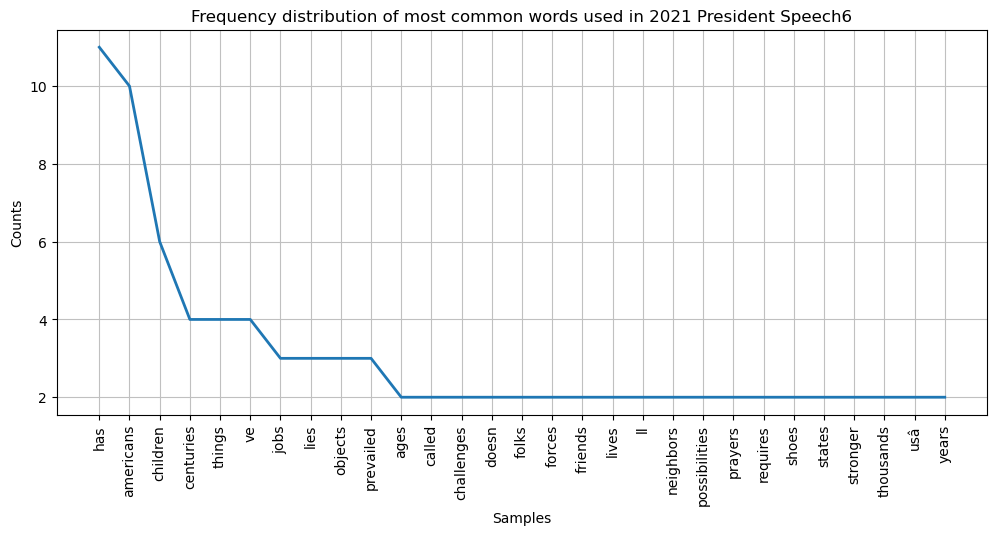

<Axes: title={'center': 'Frequency distribution of most common words used in 2021 President Speech6'}, xlabel='Samples', ylabel='Counts'>

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
uniq_words_dist.plot(title="Frequency distribution of most common words used in 2021 President Speech6")

The 2021 President Speech consisted americans 10 times, children 6 times,  jobs 3 times, challenges 2 times. Thus, based on these words it can be said that the speech could be based on nationalism, future and jobs. 

## President Speech with maximum length:

In [8]:
max_words = 0
for fid in inaugural.fileids():
    word_len = len(inaugural.words(fid))
    if max_words < word_len:
        file_id = fid
        max_words = max(max_words, word_len)
    #print(f"{fid} :  {word_len}")
print(f"Maximum length of Presidential speech was in {file_id[0:4]} with word length {max_words}.")

Maximum length of Presidential speech was in 1841 with word length 9165.


## Trend of words America, Job, Security in President Speech

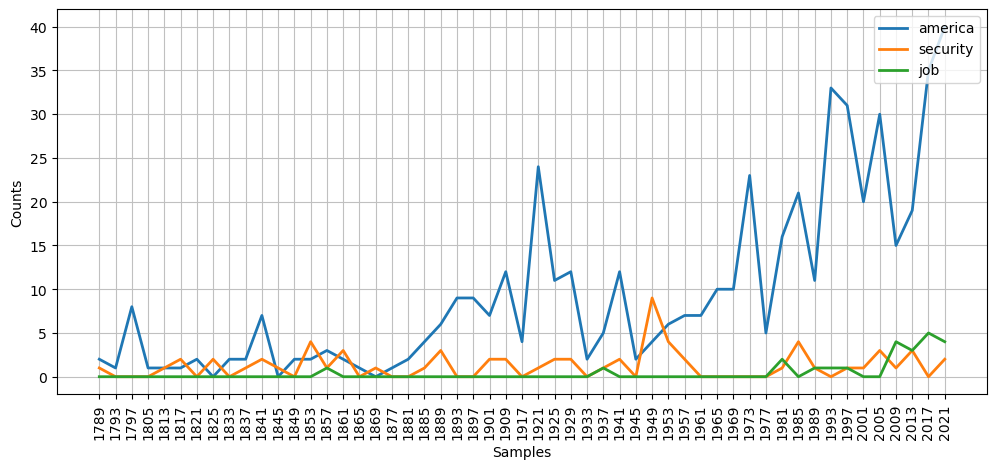

<Axes: xlabel='Samples', ylabel='Counts'>

In [9]:
cfd = nltk.ConditionalFreqDist(
... (target, fileid[:4])
... for fileid in inaugural.fileids()
... for w in inaugural.words(fileid)
... for target in ['america', 'job', 'security']
... if w.lower().startswith(target))
plt.figure(figsize=(12,5))
cfd.plot()

It can be seen that in recent years President Speeches have stress on nationalism and after 2005 it includes jobs more than 2005. 


## 2.  Consider the whole corpus 
#### Number of unique words in the corpus

In [10]:
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)
all_words = inaugural.words()
all_words = [w for w in all_words if w not in punctuations and w not in stop_words]
all_unique_words = unique_words(all_words)
print(f"Count of unique words : {len(all_unique_words)}")
print(all_unique_words[:10])

Count of unique words : 2810
['abdicated', 'abilities', 'abodes', 'abolished', 'abolishing', 'aborigines', 'abounds', 'abridging', 'absorbs', 'abstaining']


## Distribution of unique words in the corpus with frequency more than 30 

In [11]:
fdist = nltk.FreqDist([w.lower() for w in all_words])
uniq_words_dist ={} 
for i in range(len(all_unique_words)):
    if fdist[all_unique_words[i]]>30:
        uniq_words_dist[all_unique_words[i]]=fdist[all_unique_words[i]]
uniq_words_dist=nltk.FreqDist(uniq_words_dist)

## Plot of distribution of the most frequent unique words in the corpus with frequency > 30

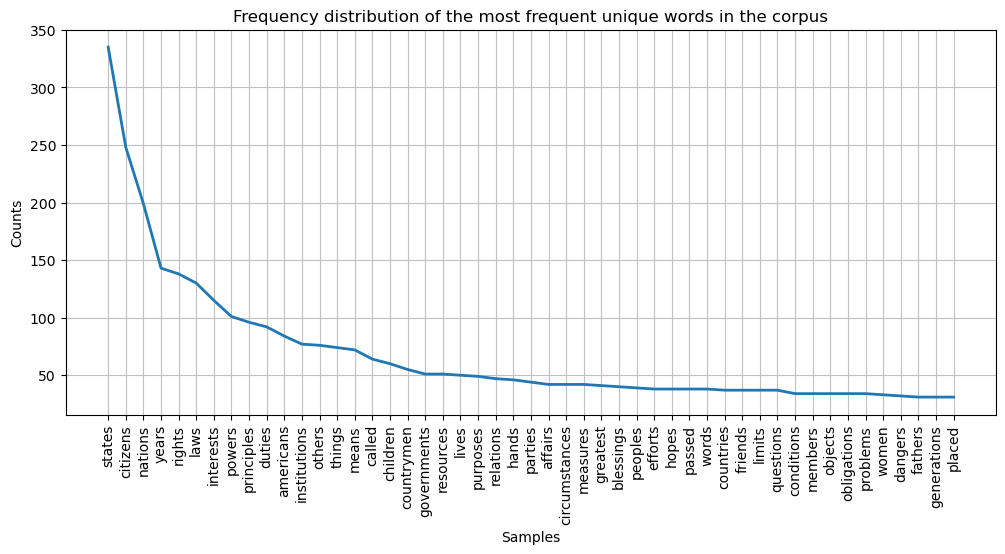

<Axes: title={'center': 'Frequency distribution of the most frequent unique words in the corpus'}, xlabel='Samples', ylabel='Counts'>

In [12]:
plt.figure(figsize=(12, 5))
uniq_words_dist.plot(title="Frequency distribution of the most frequent unique words in the corpus")

#### It can be seen that some of the most common unique words in this corpus are states, citizen, nations, laws, powers, duties, etc. 
## 3. Unique words comprising half of the corpus

In [13]:
index_of_half = round(len(all_words)/2)
half_corpus = np.random.choice(all_words, index_of_half)  ## Half corpus is selected at random to minimize the bias
len(half_corpus)

35606

In [14]:
list_of_common_words = fdist.most_common()
total = 0
for (i, (w, c)) in enumerate(list_of_common_words):
    if total < len(half_corpus):
        total+=c
    else: break 
print(f"Number of unique words comprising about half of the corpus : {i}")

Number of unique words comprising about half of the corpus : 438


## 4. Two hundred highest frequency words in this corpus.

In [15]:
two100_highest_freq_words = []
count = []
index = 0
for (i, (w, c)) in enumerate(list_of_common_words):
    if index < 200 and w in all_unique_words:
        index +=1
        two100_highest_freq_words.append(w)
        count.append(c)
    #else: break
df_200_mfreq = pd.DataFrame({'Words': two100_highest_freq_words, 
                            'Count': count})
df_200_mfreq.head(10)

,Words,Count
0,states,335
1,citizens,248
2,nations,199
3,years,143
4,rights,138
5,laws,130
6,interests,115
7,powers,101
8,principles,96
9,duties,92


In [16]:
df_200_mfreq['Relative Frequency'] = df_200_mfreq.Count/sum(df_200_mfreq.Count)
df_200_mfreq

,Words,Count,Relative Frequency
0,states,335,0.056001
1,citizens,248,0.041458
2,nations,199,0.033266
3,years,143,0.023905
4,rights,138,0.023069
...,...,...,...
195,services,12,0.002006
196,wishes,12,0.002006
197,points,12,0.002006
198,republics,12,0.002006


## 5. Graph that shows the relative frequency of these 200 words

Text(0.5, 1.0, 'Plot of relative frequency of 200 most frequent unique words in corpus')

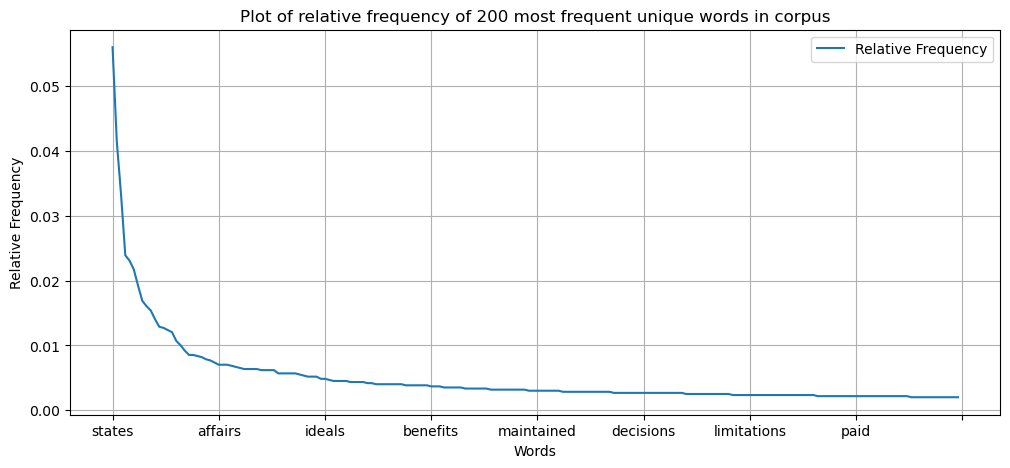

In [17]:
ax= df_200_mfreq.plot(x= 'Words', y='Relative Frequency', figsize = (12, 5))
plt.grid()
plt.ylabel("Relative Frequency")
plt.title("Plot of relative frequency of 200 most frequent unique words in corpus")

#### Some words are not displayed because for 200 xticks might be cluttered. But we can see 200 words as list

## 6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
Answer. It can be seen from the plot that the relative frequency of very few words is very more than 0.01 while large number of words has relative frequency less than 0.01. It confirms the Zipf's law that very few words in a corpus is very frequent and large number of words are infrequent. 

## 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”
Answer. it might be only a small segment of all the corpuses but its nature resembles with the set of all the corpora. Since this corpus is from speeches of US president, therefore it is just genral or sample of all the corpora. However, specific corpus such as biology text has its own words but Zipf's law is applicable to any corpus. 